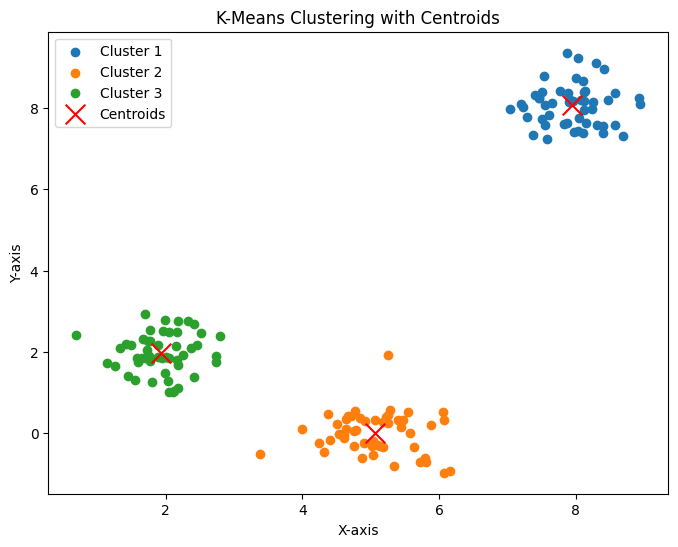

In [4]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate some sample data
np.random.seed(42)
data = np.vstack([
    np.random.normal(loc=[2, 2], scale=0.5, size=(50, 2)),
    np.random.normal(loc=[8, 8], scale=0.5, size=(50, 2)),
    np.random.normal(loc=[5, 0], scale=0.5, size=(50, 2))
])

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data)

# Get the cluster centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Plot the data points and centroids
plt.figure(figsize=(8, 6))
for i in range(3):  # Loop through clusters
    cluster_points = data[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i+1}")

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label="Centroids")
plt.legend()
plt.title("K-Means Clustering with Centroids")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()


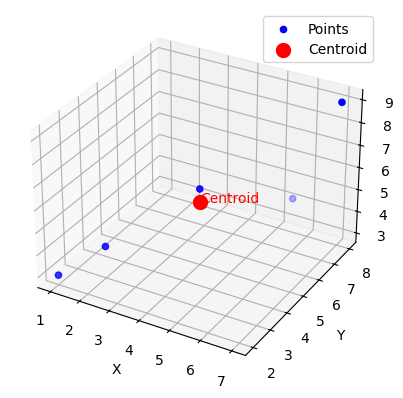

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define a set of 3D points
points = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [2, 3, 4],
    [6, 7, 5],
])

# Calculate the centroid
centroid = np.mean(points, axis=0)

# Plot the points and the centroid
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot original points
ax.scatter(points[:, 0], points[:, 1], points[:, 2], color='blue', label='Points')

# Plot centroid
ax.scatter(*centroid, color='red', s=100, label='Centroid')

# Annotate the centroid
ax.text(centroid[0], centroid[1], centroid[2], 'Centroid', color='red')

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

# Display the plot
plt.show()


In [57]:
import pandas as pd
import numpy as np
import tensorflow as tf
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.optimizers import Adam
from keras.initializers import he_normal
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers

# Step 1: Load and preprocess the data
def preprocess_data(csv_path):
    df = pd.read_csv(csv_path )

    # Convert date to seconds since 1970-01-01
    df['date'] = df['date'].apply(
        lambda x: int(datetime.strptime(x, "%d/%m/%Y").timestamp())
    )

    #df['date'] = df['date'] % 31536000

    # Features and target
    X = df[['id', 'date']].values
    y = df[['1', '2', '3', '4', '5', '6', '7']].values

    print(X[0])
    # Normalize the `id` and `seconds_since_1970`
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)


    return X_scaled, y , scaler , X , y

# Load the CSV data
csv_path = 'lotto_final.csv'  # Replace with your CSV file path
X, y  , scaler , x_orig , y_orig = preprocess_data(csv_path)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 , shuffle=True )

# Step 2: Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),  # Input layer for id and seconds_since_1970
    tf.keras.layers.Dense(128, activation='relu' , kernel_initializer='he_normal' , use_bias=True,  bias_initializer=RandomNormal(0.5, 0.1)),
    tf.keras.layers.Dense(64, activation='relu'  , kernel_initializer='he_normal' , use_bias=True,  bias_initializer=RandomNormal(0.5, 0.1)),
    tf.keras.layers.Dense(7, activation='linear' , kernel_initializer='he_normal', use_bias=True,  bias_initializer=RandomNormal(0.5, 0.1))  # Output 7 numbers
])



# Compile the model
# optimizer = Adam(learning_rate=0.001)
model.compile(optimizer= 'Adam' , loss='mse', metrics=['mae'])

# Step 3: Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Step 4: Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")

# Save the model
model.save('number_generator_model.h5')


[      3764 1734998400]
Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 334.7081 - mae: 14.5376 - val_loss: 136.6317 - val_mae: 8.8789
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 104.0617 - mae: 7.6621 - val_loss: 50.0071 - val_mae: 5.3862
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 50.3333 - mae: 5.4333 - val_loss: 41.0317 - val_mae: 4.9572
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 41.8512 - mae: 5.0220 - val_loss: 37.5133 - val_mae: 4.7576
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 39.5901 - mae: 4.8934 - val_loss: 34.3245 - val_mae: 4.5853
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 35.6133 - mae: 4.6663 - val_loss: 31.7350 - val_mae: 4.4181
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32.7805 - mae: 4.4873 - val_loss: 29.7660 - val_mae: 4.2855
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29.2998 - mae: 4.2540 - val_loss: 28.3724 - val_mae: 4.2015
Epoch 9/100
31/31 

Test Loss: 24.9826, Test MAE: 3.9086


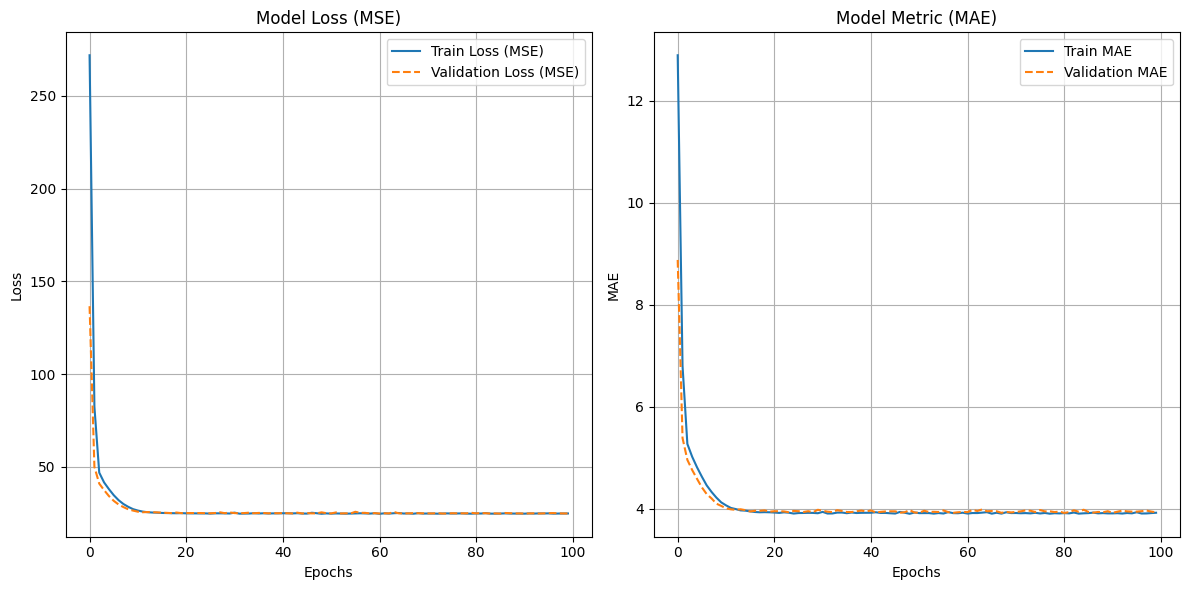

In [58]:
# Plotting the loss and metrics
plt.figure(figsize=(12, 6))

# Plot MSE (Loss)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)', linestyle='--')
plt.title('Model Loss (MSE)')
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot MAE (Metric)
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE', linestyle='--')
plt.title('Model Metric (MAE)')
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()


In [59]:
import datetime

# Define the date
date = datetime.datetime(2024, 12, 26)
id = 3765

# Convert to seconds from 1970
seconds_from_1970 = int(date.timestamp())
print(seconds_from_1970)
print(id)

1735171200
3765


In [60]:
# Input array

#test_array = np.array([3764, 1735041190])
test_array = np.array([id, seconds_from_1970])

# Reshape the input to match the model's expected input shape (1, 2)
test_array = test_array.reshape(1, -1)

scaled_test_array = scaler.transform(test_array)

# Make a prediction
prediction = model.predict(scaled_test_array)

print("input :", test_array)
print("scaled input :", scaled_test_array)
print("Prediction:", np.round(prediction))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
input : [[      3765 1735171200]]
scaled input : [[1.73316934 1.71065937]]
Prediction: [[ 6. 11. 16. 22. 28. 33.  4.]]


In [90]:
layer = model.layers[2]  # Access the first layer

# Get weights and biases
weights, biases = layer.get_weights()

print("Weights matrix:", weights.shape)
print("Bias vector:", biases.shape)

Weights matrix: (64, 7)
Bias vector: (7,)


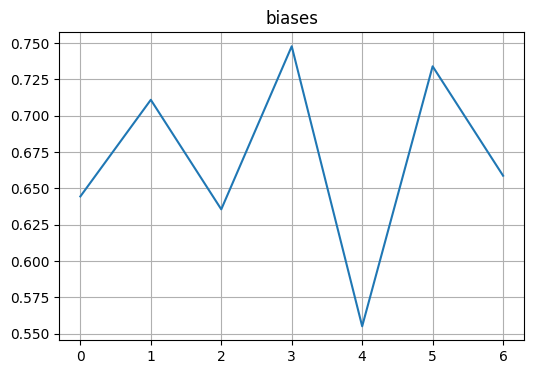

In [91]:
plt.figure(figsize=(6, 4))

# Plot MSE (Loss)
plt.plot(biases, label='biases')
plt.title('biases')
plt.grid(True)
plt.show()

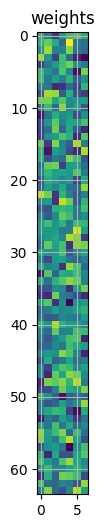

In [92]:
plt.figure(figsize=(10, 6))

# Plot MSE (Loss)
plt.imshow(weights, label='weights')
plt.title('weights')
plt.grid(True)
plt.show()

In [93]:
weights_l = weights.reshape(-1, 1).squeeze()
print(weights_l.shape)
mean = np.mean(weights_l)
std = np.std(weights_l)
print(mean , std)

(448,)
0.04954624 0.1799716


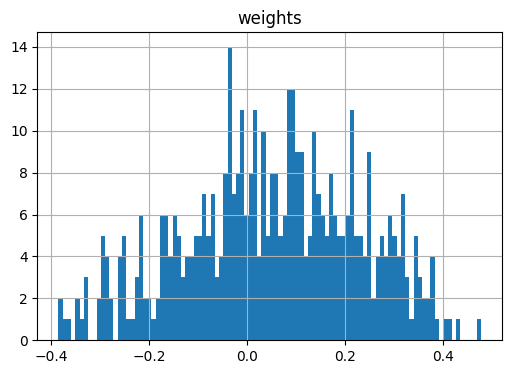

In [94]:
plt.figure(figsize=(6, 4))
plt.hist(weights_l , bins=100 )
plt.title('weights')
plt.grid(True)
plt.show()

In [44]:
import numpy as np
from sklearn.preprocessing import QuantileTransformer
rng = np.random.RandomState(0)
X = np.sort(rng.normal(loc=0.5, scale=0.25, size=(25, 1)), axis=0)
print(X)
qt = QuantileTransformer(n_quantiles=5, random_state=0)
qt.fit_transform(X)

[[-0.13824745]
 [ 0.25568053]
 [ 0.28647607]
 [ 0.31445874]
 [ 0.44871043]
 [ 0.4621607 ]
 [ 0.47419529]
 [ 0.53041875]
 [ 0.53601089]
 [ 0.57826693]
 [ 0.58341858]
 [ 0.6000393 ]
 [ 0.60264963]
 [ 0.61096581]
 [ 0.66340465]
 [ 0.69025943]
 [ 0.71610905]
 [ 0.7375221 ]
 [ 0.7446845 ]
 [ 0.86356838]
 [ 0.87351977]
 [ 0.94101309]
 [ 0.9668895 ]
 [ 1.0602233 ]
 [ 1.06743866]]


array([[0.        ],
       [0.16080196],
       [0.17337275],
       [0.18479532],
       [0.23959705],
       [0.24508746],
       [0.25      ],
       [0.35942306],
       [0.37030657],
       [0.45254598],
       [0.46257222],
       [0.49491974],
       [0.5       ],
       [0.51463757],
       [0.60693681],
       [0.65420475],
       [0.69970347],
       [0.73739325],
       [0.75      ],
       [0.84208548],
       [0.84979366],
       [0.90207286],
       [0.9221163 ],
       [0.99441111],
       [1.        ]])